In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# Load the dataset
train_df = pd.read_csv('../input/cat-in-the-dat/train.csv')
test_df = pd.read_csv('../input/cat-in-the-dat/test.csv')

In [3]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
test_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [5]:
train_df.shape,test_df.shape

((300000, 25), (200000, 24))

In [6]:
#check for missing values in train dataset
train_df.isnull().sum()

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [7]:
#check for missing values in test dataset
test_df.isnull().sum()

id       0
bin_0    0
bin_1    0
bin_2    0
bin_3    0
bin_4    0
nom_0    0
nom_1    0
nom_2    0
nom_3    0
nom_4    0
nom_5    0
nom_6    0
nom_7    0
nom_8    0
nom_9    0
ord_0    0
ord_1    0
ord_2    0
ord_3    0
ord_4    0
ord_5    0
day      0
month    0
dtype: int64

In [8]:
train_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

### Nominal features

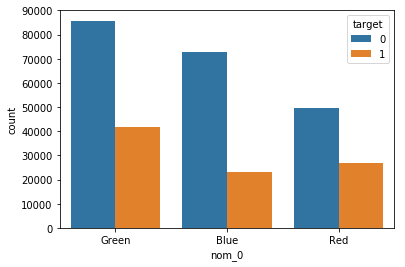

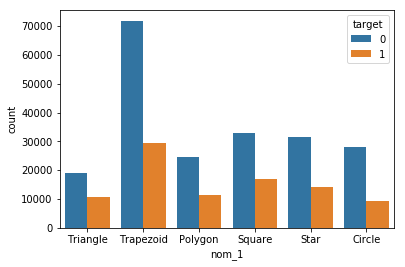

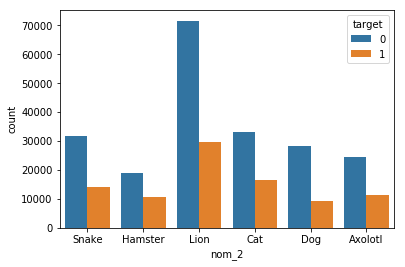

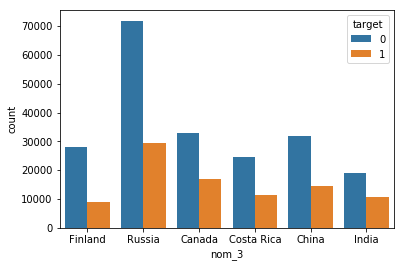

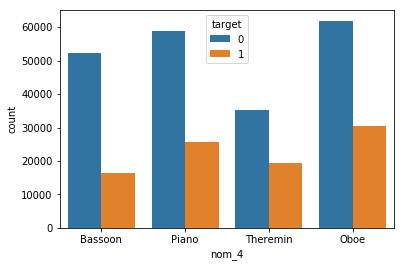

In [9]:
nom = ["nom_0","nom_1","nom_2","nom_3","nom_4"]
for i,col in enumerate(nom):
    plt.figure(i)
    sns.countplot(x=train_df[col],hue=train_df["target"])

### Ordinal features

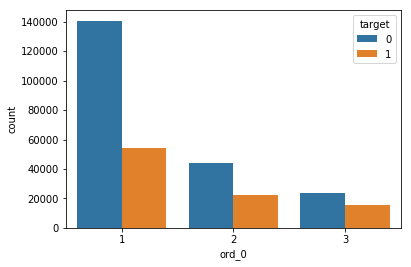

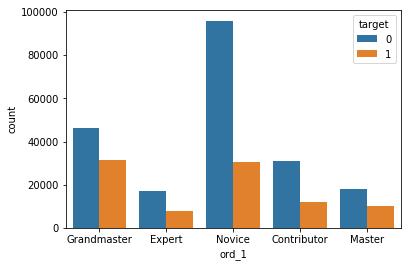

In [10]:
ords = ["ord_0","ord_1"]
for i,col in enumerate(ords):
    plt.figure(i)
    sns.countplot(x=train_df[col],hue=train_df["target"])

### Let's Convert categorical strings into intergers 

In [11]:
for feature in train_df.columns: # Loop through all columns in the dataframe
    if train_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        train_df[feature] = pd.Categorical(train_df[feature]).codes # Replace strings with an integer

In [12]:
for feature in test_df.columns: # Loop through all columns in the dataframe
    if test_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        test_df[feature] = pd.Categorical(test_df[feature]).codes # Replace strings with an integer

In [13]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,1,5,5,3,...,2175,2,2,1,7,3,136,2,2,0
1,1,0,1,0,1,1,1,4,3,5,...,11635,1,2,3,0,0,93,7,8,0
2,2,0,0,0,0,1,0,4,4,5,...,8078,1,1,4,7,17,31,7,2,0
3,3,0,1,0,0,1,2,4,5,0,...,6056,1,2,0,8,3,134,2,1,1
4,4,0,0,0,0,0,2,4,4,0,...,8231,1,2,2,0,17,158,7,8,0


In [14]:
# drop id and target columns from train and test dataset
train_drops = ["id","target"]
test_drops = ["id"]
X = train_df.drop(train_drops,axis=1)
y = train_df["target"]

In [15]:
X.shape

(300000, 23)

### Scaling Data

In [16]:
std = MinMaxScaler()
std.fit(X)
X_train = std.transform(X)
X_test = std.transform(test_df.drop(test_drops,axis=1))

### Let's apply clssification algorithms with StratifiedKFold

In [17]:
# RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.6973883768603857

2 of kfold 5
accuracy_score 0.69955

3 of kfold 5
accuracy_score 0.7011333333333334

4 of kfold 5
accuracy_score 0.6978833333333333

5 of kfold 5
accuracy_score 0.7015616926948782


In [18]:
# XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = xgboost.XGBClassifier()
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7367043882601957

2 of kfold 5
accuracy_score 0.7363166666666666

3 of kfold 5
accuracy_score 0.7389666666666667

4 of kfold 5
accuracy_score 0.7366333333333334

5 of kfold 5
accuracy_score 0.7357955965932765


### Let's use DNN

In [19]:
# split data into train and validation set
trainX,validX,trainy,validy = train_test_split(X_train,y)

In [20]:
# Build DNN
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,input_dim = 23, activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

In [21]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [22]:
model.fit(trainX,trainy,validation_data=(validX,validy),batch_size=128,epochs=30)

Train on 225000 samples, validate on 75000 samples
Epoch 1/30
225000/225000 [==============================] - 11s 49us/sample - loss: 0.7231 - acc: 0.7137 - val_loss: 0.5542 - val_acc: 0.7279
Epoch 2/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5495 - acc: 0.7279 - val_loss: 0.5456 - val_acc: 0.7290
Epoch 3/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5440 - acc: 0.7301 - val_loss: 0.5429 - val_acc: 0.7296
Epoch 4/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5406 - acc: 0.7315 - val_loss: 0.5370 - val_acc: 0.7344
Epoch 5/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5371 - acc: 0.7332 - val_loss: 0.5357 - val_acc: 0.7303
Epoch 6/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5345 - acc: 0.7335 - val_loss: 0.5308 - val_acc: 0.7364
Epoch 7/30
225000/225000 [==============================] - 10s 46us/sample - loss: 0.5327 - acc:

In [23]:
pred = model.predict_proba(X_test)

In [24]:
outs = [x[0] for x in pred]

In [25]:
sub = pd.DataFrame({"id":test_df["id"],"target":outs})

In [26]:
# sub.to_csv("sample_submission.csv",index=False)

In [27]:
# from IPython.display import FileLink
# FileLink('sample_submission.csv')